# Health Insurance Premium Prediction 

## Loading Libraries 

In [1]:
import numpy as np        # scientific Calculations
import pandas as pd       # data manupulation, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Exploring dataset

In [2]:
df=pd.read_csv('Health_insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


The ranges of values in the numerical columns seem reasonable too (no negative ages!), so we may not have to do much data cleaning or correction. 

The "expenses" column seems to be significantly skewed however, as the median (50 percentile) is much lower than the maximum value.

1) The range of expenses in the numerical column seems to have lot of difference in 75 percentile and the maximun expenses it looks like outliers. So we will handle that outlierr.

2) The range of the bmi in the numerical columns seems to have little difference in 75 percentile and the maximum bmi value.

3) Almost 50 percent of the customers have one child.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
data=df.copy()

In [9]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

## Performing EDA to see the distribution of data

In [10]:
data["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [11]:
data["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [12]:
data["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

#### Gender vs Smoker

<AxesSubplot:xlabel='sex', ylabel='count'>

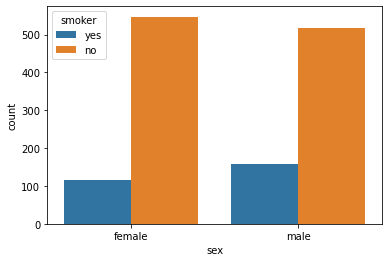

In [13]:
sns.countplot(data=data,x="sex",hue="smoker")

It appears that 20% of the customers have reported they smoking.

We can also see that smoking appears a more common habit among males.
 

#### Age 

<AxesSubplot:xlabel='age', ylabel='Count'>

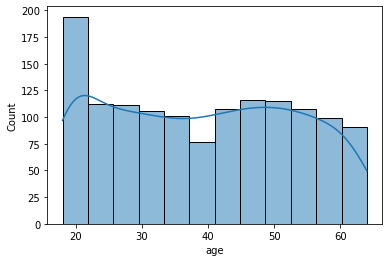

In [14]:
sns.histplot(data["age"],kde=True)

The distribution of ages in the dataset is almost uniform, with 20-30 customers at every age, except for the ages 18 and 19, which seem to have over twice as many customers as other ages.

#### Charges

<AxesSubplot:xlabel='charges', ylabel='Count'>

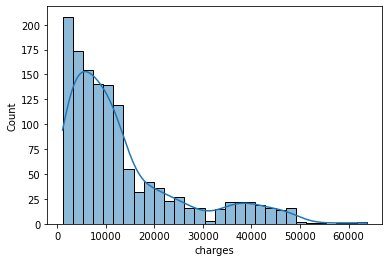

In [15]:
sns.histplot(data["charges"],kde=True)

For most customers, the annual medical expenses are under 10k. Only a small fraction of customer have higher medical expenses, possibly due to accidents, major illnesses and genetic diseases. 

The distribution follows a "power law"

There is a significant difference in medical expenses between smokers and non-smokers. While the median for non-smokers is 7.3k, the median for smokers is close to 35k.


#### BMI 

<AxesSubplot:xlabel='bmi', ylabel='Count'>

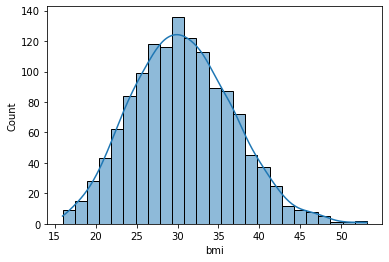

In [16]:
sns.histplot(data["bmi"],kde=True)

BMI Distribution looks like a guassian distribution centered around 30.

#### Children

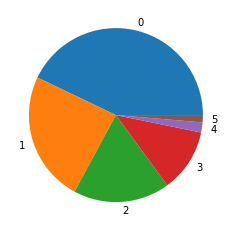

In [17]:
plt.pie(data["children"].value_counts(),labels=["0","1","2","3","4","5"])
plt.show()

#### Average amount to be paid based on No of Children 

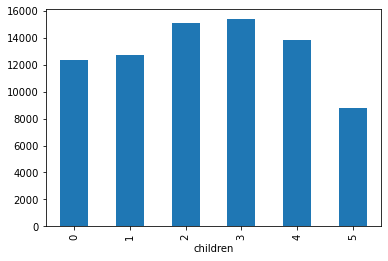

In [18]:
df.groupby("children")['charges'].mean().plot.bar()
plt.show()

#### Average amount  paid by a smoker and Non smoker 

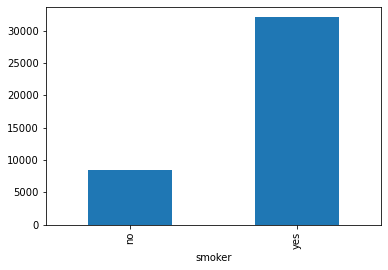

In [19]:
df.groupby("smoker")['charges'].mean().plot.bar()
plt.show()

#### Average amount paid at Different locations 

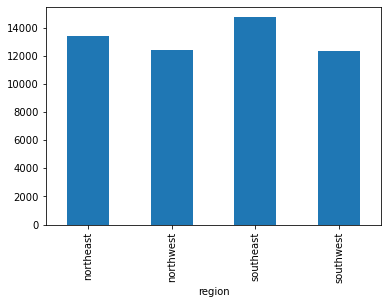

In [20]:
df.groupby("region")['charges'].mean().plot.bar()
plt.show()

#### Average amount paid by Male and female 

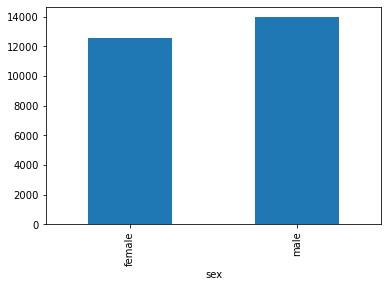

In [21]:
df.groupby("sex")['charges'].mean().plot.bar()
plt.show()

In [22]:
male=data[data["sex"]=="male"]
male
female=data[data["sex"]=="female"]
female

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92400
5,31,female,25.74,0,no,southeast,3756.62160
6,46,female,33.44,1,no,southeast,8240.58960
7,37,female,27.74,3,no,northwest,7281.50560
9,60,female,25.84,0,no,northwest,28923.13692
...,...,...,...,...,...,...,...
1332,52,female,44.70,3,no,southwest,11411.68500
1334,18,female,31.92,0,no,northeast,2205.98080
1335,18,female,36.85,0,no,southeast,1629.83350
1336,21,female,25.80,0,no,southwest,2007.94500


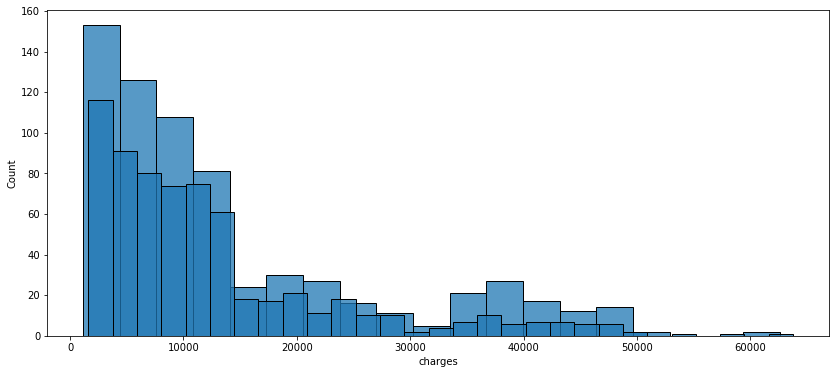

In [23]:
plt.figure(figsize=(14,6))
sns.histplot(data=male,x="charges")
sns.histplot(data=female,x="charges")
plt.show()

There is a significant difference in charges between male and female but the mean for male and female is almost same.

#### Distribution of expenses based on region

<AxesSubplot:xlabel='charges', ylabel='Count'>

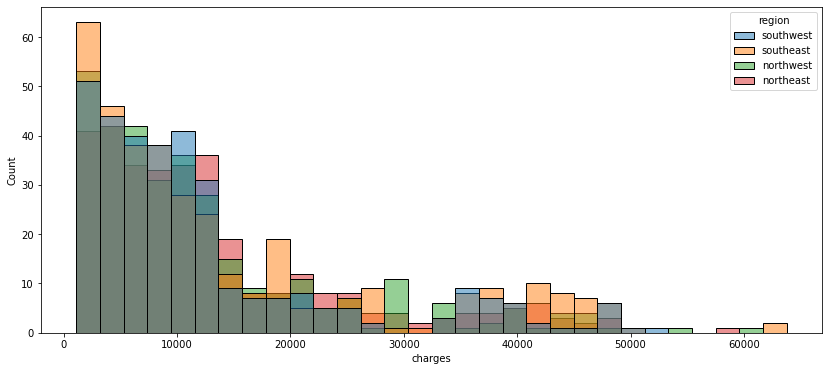

In [24]:
plt.figure(figsize=(14,6))

sns.histplot(data=data,x="charges",hue="region")

## Encoding 

In [25]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
data["sex"] = labelEncoder.fit_transform(data["sex"])
data["smoker"] = labelEncoder.fit_transform(data["smoker"])
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [26]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
columnTransformer = ColumnTransformer(transformers = [('encoder',OneHotEncoder(),[5])], remainder="passthrough")
datavalues = columnTransformer.fit_transform(data)

In [27]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [28]:
X = datavalues[:,:-1]
y = datavalues[:,-1]

In [29]:
X

array([[ 0.  ,  0.  ,  0.  , ..., 27.9 ,  0.  ,  1.  ],
       [ 0.  ,  0.  ,  1.  , ..., 33.77,  1.  ,  0.  ],
       [ 0.  ,  0.  ,  1.  , ..., 33.  ,  3.  ,  0.  ],
       ...,
       [ 0.  ,  0.  ,  1.  , ..., 36.85,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ..., 25.8 ,  0.  ,  0.  ],
       [ 0.  ,  1.  ,  0.  , ..., 29.07,  0.  ,  1.  ]])

## Train Test Split 

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state=11)

In [31]:
print(data.var())

age         1.974014e+02
sex         2.501596e-01
bmi         3.718788e+01
children    1.453213e+00
smoker      1.629689e-01
charges     1.466524e+08
dtype: float64


## Scaling the model

In [32]:
from sklearn.preprocessing import StandardScaler
st_X = StandardScaler()
st_Y = StandardScaler()
X_train = st_X.fit_transform(X_train)
X_test = st_X.transform(X_test)
y_train = st_Y.fit_transform(y_train.reshape(-1,1))
y_test = st_Y.transform(y_test.reshape(-1,1))

## Model Evaluation 

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Multiple Linear Regression 

In [34]:
from sklearn import datasets, linear_model, metrics
reg = linear_model.LinearRegression()
  
# train the model using the training sets
reg.fit(X_train, y_train)

LinearRegression()

In [35]:
ypred = reg.predict(X_test)
#print(ydata.head())

In [36]:
print("Mean Absolute Error:",mean_absolute_error(y_test, ypred))
print("Mean Squared Error:",mean_squared_error(y_test, ypred))

MLR_RMSE=np.sqrt(mean_squared_error(y_test, ypred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, ypred)))
                
MLR_R2=r2_score(y_test,ypred)                              
print("R2 score:",r2_score(y_test,ypred))

Mean Absolute Error: 0.3187545134899673
Mean Squared Error: 0.19127289833280237
Root Mean Squared Error: 0.43734757154099113
R2 score: 0.7967123014926318


### Decison Tree regression 

In [37]:
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [38]:
ypred = regressor.predict(X_test)

In [39]:
print("Mean Absolute Error:",mean_absolute_error(y_test, ypred))
print("Mean Squared Error:",mean_squared_error(y_test, ypred))
DT_RMSE=np.sqrt(mean_squared_error(y_test, ypred))

print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, ypred)))

DT_R2=r2_score(y_test,ypred)               
                
print("R2 score:",r2_score(y_test,ypred))

Mean Absolute Error: 0.23719376648254117
Mean Squared Error: 0.24758969638263478
Root Mean Squared Error: 0.49758385864358057
R2 score: 0.7368579658149501


### Random Forest Regressor 

In [40]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(X_train, y_train)

RandomForestRegressor()

In [41]:
ypred = forest.predict(X_test)
ydata = pd.DataFrame(data={"Predicted Premium Amount": ypred})
print(ydata.head())

   Predicted Premium Amount
0                  1.866013
1                 -0.670469
2                 -0.494851
3                 -0.389794
4                 -0.278942


In [42]:
print("Mean Absolute Error:",mean_absolute_error(y_test, ypred))
print("Mean Squared Error:",mean_squared_error(y_test, ypred))
RFR_RMSE=np.sqrt(mean_squared_error(y_test, ypred))

print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, ypred)))
                 
RFR_R2=r2_score(y_test,ypred)               
print("R2 score:",r2_score(y_test,ypred))

Mean Absolute Error: 0.19981879347901896
Mean Squared Error: 0.12755625672629162
Root Mean Squared Error: 0.35715018791300057
R2 score: 0.8644313016317386


In [43]:
compare = pd.DataFrame({"Actual": y_test[:,0], "Predicted": ypred.reshape(-1,1)[:,0]})
compare.head()

,Actual,Predicted
0,1.888680,1.866013
1,-0.733918,-0.670469
2,-0.469525,-0.494851
3,-0.360760,-0.389794
4,-0.311786,-0.278942


In [44]:
models=pd.DataFrame({"Model_Name":["Multiple Linear Regression","Decison Tree","Random Forest Regressor"],
                    "RMSE":[MLR_RMSE,DT_RMSE,RFR_RMSE],"R2":[MLR_R2,DT_R2,RFR_R2]})
models

,Model_Name,RMSE,R2
0,Multiple Linear Regression,0.437348,0.796712
1,Decison Tree,0.497584,0.736858
2,Random Forest Regressor,0.357150,0.864431
